In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data21 = dd.read_csv(r'훈련생 전달용\iMBANK_CUSTOMER_DATA(K-DigitalTraining)\iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv', encoding = 'cp949')
data22 = dd.read_csv(r'훈련생 전달용\iMBANK_CUSTOMER_DATA(K-DigitalTraining)\iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv', encoding = 'cp949')
data23 = dd.read_csv(r'훈련생 전달용\iMBANK_CUSTOMER_DATA(K-DigitalTraining)\iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv', encoding = 'cp949')

In [4]:
df4 = data21.compute()

In [ ]:
# df5 = data22.compute()
# df6 = data23.compute()

In [5]:
df4

,기준년월,고객ID,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
0,202112,9999998161,60대이상,여,일반등급,대구광역시,달서구,1400000,0,0,0,0,0
1,202112,9999997589,60대이상,남,일반등급,경상북도,경주시,0,10000000,500000,0,0,0
2,202112,9999991579,60대이상,여,일반등급,경상북도,성주군,0,30000000,0,0,0,0
3,202112,9999989448,60대이상,남,일반등급,대구광역시,달서구,400000,0,0,0,0,0
4,202112,9999988325,60대이상,남,일반등급,대구광역시,달서구,2700000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914515,202101,3032279323,40대,여,일반등급,경기도,성남시 분당구,0,0,0,0,0,0
914516,202101,3032277893,20대,여,일반등급,경기도,성남시 중원구,0,0,0,0,0,0
914517,202101,3032277326,30대,여,일반등급,경기도,고양시 덕양구,0,0,0,0,0,0
914518,202101,3032273566,20대,남,일반등급,서울특별시,강동구,0,0,0,0,0,0


# 연령대별 차이

In [5]:
df4['연령'] = df4['연령대'].astype(str).apply(lambda x: x[:2])
df4['연령'] = pd.to_numeric(df4['연령'], errors='coerce')

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20835992 entries, 0 to 914519
Data columns (total 14 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   기준년월      int32 
 1   고객ID      int64 
 2   연령대       string
 3   성별        string
 4   고객등급      string
 5   자택_시도     string
 6   자택_시군구    string
 7   수신_요구불예금  int64 
 8   수신_거치식예금  int64 
 9   수신_적립식예금  int64 
 10  수신_펀드     int64 
 11  수신_외화예금   int64 
 12  대출금액      int64 
 13  연령        int64 
dtypes: int32(1), int64(8), string(5)
memory usage: 3.2 GB


In [25]:
df4['기준년월'] = df4['기준년월'].astype(int)
data4 = df4.loc[df4.groupby('고객ID')['기준년월'].idxmax()]

In [26]:
data4

,기준년월,고객ID,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액,연령
869072,202112,6433872811,30대,여,일반등급,대구광역시,북구,0,0,0,0,0,20000000,30
869072,202112,2800584251,20대,남,일반등급,울산광역시,울주군,0,0,0,0,0,0,20
869072,202111,6230828126,40대,여,일반등급,대구광역시,동구,0,2500000,0,0,0,0,40
869072,202110,9759902859,60대이상,여,일반등급,대구광역시,달서구,10000000,20000000,0,0,0,20000000,60
869072,202110,5995841594,60대이상,남,일반등급,대구광역시,동구,200000,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,202103,7514815002,40대,여,일반등급,경상북도,포항시 북구,0,0,0,0,0,0,40
0,202103,3811874387,10대미만,여,일반등급,대구광역시,수성구,0,0,4800000,0,0,0,10
0,202102,7154819128,50대,남,일반등급,경상북도,영천시,200000,0,0,0,0,0,50
0,202102,3440130533,30대,여,일반등급,부산광역시,부산진구,0,0,0,0,0,0,30


In [27]:
pd.options.display.float_format = '{:.1f}'.format

agg = {
    '수신_요구불예금': 'mean',
    '수신_거치식예금': 'mean',
    '수신_펀드': 'mean',
    '수신_외화예금': 'mean',
    '대출금액': 'mean'
}

result4 = data4.groupby('연령').agg(agg).reset_index()

In [28]:
result4

,연령,수신_요구불예금,수신_거치식예금,수신_펀드,수신_외화예금,대출금액
0,10,942571.4,120903.7,111550.5,2617.2,3499.7
1,20,1259630.1,412762.9,77638.9,8463.1,752532.5
2,30,2617764.4,822856.9,104884.4,20763.1,2522754.0
3,40,3958485.4,1332039.0,223278.6,41197.7,3223497.0
4,50,5043947.6,2106010.6,289609.4,69443.1,3104655.7
5,60,4551973.6,3292146.7,187121.7,87800.8,1626725.7


In [33]:
result4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연령        6 non-null      int64  
 1   수신_요구불예금  6 non-null      float64
 2   수신_거치식예금  6 non-null      float64
 3   수신_펀드     6 non-null      float64
 4   수신_외화예금   6 non-null      float64
 5   대출금액      6 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 420.0 bytes


In [29]:
correlations4 = result4.corr()

In [34]:
correlations4

,연령,수신_요구불예금,수신_거치식예금,수신_펀드,수신_외화예금,대출금액
연령,1.0,1.0,1.0,0.7,1.0,0.6
수신_요구불예금,1.0,1.0,0.9,0.9,0.9,0.8
수신_거치식예금,1.0,0.9,1.0,0.7,1.0,0.4
수신_펀드,0.7,0.9,0.7,1.0,0.8,0.7
수신_외화예금,1.0,0.9,1.0,0.8,1.0,0.5
대출금액,0.6,0.8,0.4,0.7,0.5,1.0


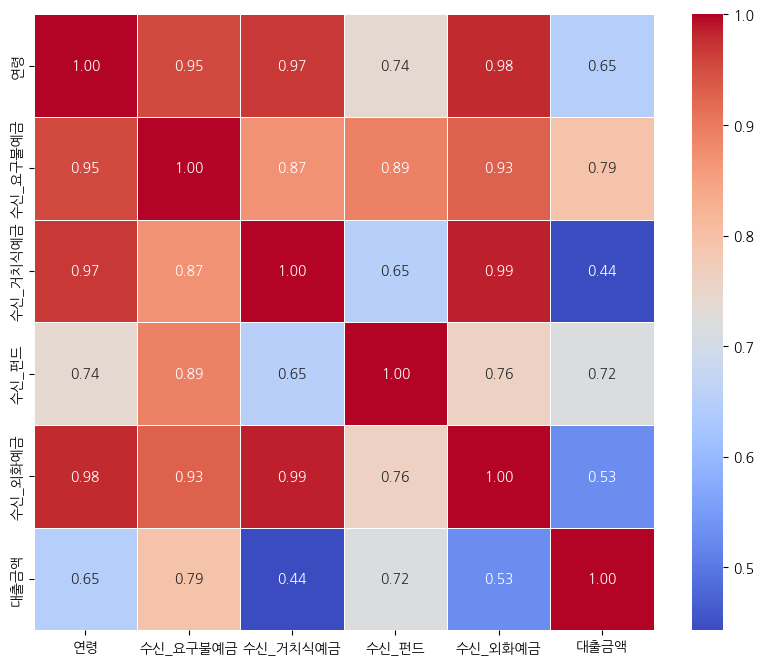

In [37]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlations4, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

- 연령대별로\
  수신_요구불예금, 수신_거치식예금, 수신_외화예금을 다르게 줘야한다\
  라는 결론

# 성별 차이

In [6]:
df4['성별'] = df4['성별'].apply(lambda x: 1 if x == '남' else 0)
df4['연령'] = df4['연령대'].astype(str).apply(lambda x: x[:2])
df4['성별'] = pd.to_numeric(df4['성별'], errors='coerce')
df4['연령'] = pd.to_numeric(df4['연령'], errors='coerce')
df4

,기준년월,고객ID,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액,연령
0,202112,9999998161,60대이상,0,일반등급,대구광역시,달서구,1400000,0,0,0,0,0,60
1,202112,9999997589,60대이상,1,일반등급,경상북도,경주시,0,10000000,500000,0,0,0,60
2,202112,9999991579,60대이상,0,일반등급,경상북도,성주군,0,30000000,0,0,0,0,60
3,202112,9999989448,60대이상,1,일반등급,대구광역시,달서구,400000,0,0,0,0,0,60
4,202112,9999988325,60대이상,1,일반등급,대구광역시,달서구,2700000,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914515,202101,3032279323,40대,0,일반등급,경기도,성남시 분당구,0,0,0,0,0,0,40
914516,202101,3032277893,20대,0,일반등급,경기도,성남시 중원구,0,0,0,0,0,0,20
914517,202101,3032277326,30대,0,일반등급,경기도,고양시 덕양구,0,0,0,0,0,0,30
914518,202101,3032273566,20대,1,일반등급,서울특별시,강동구,0,0,0,0,0,0,20


In [7]:
df4['기준년월'] = df4['기준년월'].astype(int)
data44 = df4.loc[df4.groupby('고객ID')['기준년월'].idxmax()]

In [8]:
data44

,기준년월,고객ID,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액,연령
869072,202112,6433872811,30대,0,일반등급,대구광역시,북구,0,0,0,0,0,20000000,30
869072,202112,2800584251,20대,1,일반등급,울산광역시,울주군,0,0,0,0,0,0,20
869072,202111,6230828126,40대,0,일반등급,대구광역시,동구,0,2500000,0,0,0,0,40
869072,202110,9759902859,60대이상,0,일반등급,대구광역시,달서구,10000000,20000000,0,0,0,20000000,60
869072,202110,5995841594,60대이상,1,일반등급,대구광역시,동구,200000,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,202103,7514815002,40대,0,일반등급,경상북도,포항시 북구,0,0,0,0,0,0,40
0,202103,3811874387,10대미만,0,일반등급,대구광역시,수성구,0,0,4800000,0,0,0,10
0,202102,7154819128,50대,1,일반등급,경상북도,영천시,200000,0,0,0,0,0,50
0,202102,3440130533,30대,0,일반등급,부산광역시,부산진구,0,0,0,0,0,0,30


In [10]:
data44.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40979478 entries, 869072 to 0
Data columns (total 14 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   기준년월      int32 
 1   고객ID      int64 
 2   연령대       string
 3   성별        int64 
 4   고객등급      string
 5   자택_시도     string
 6   자택_시군구    string
 7   수신_요구불예금  int64 
 8   수신_거치식예금  int64 
 9   수신_적립식예금  int64 
 10  수신_펀드     int64 
 11  수신_외화예금   int64 
 12  대출금액      int64 
 13  연령        int64 
dtypes: int32(1), int64(9), string(4)
memory usage: 6.0 GB


In [11]:
pd.options.display.float_format = '{:.1f}'.format

agg = {
    '수신_요구불예금': 'mean',
    '수신_거치식예금': 'mean',
    '수신_펀드': 'mean',
    '수신_외화예금': 'mean',
    '대출금액': 'mean'
}

result44 = data44.groupby(['연령','성별']).agg(agg).reset_index()

In [12]:
correlations44 = result44.corr()

In [13]:
correlations44

,연령,성별,수신_요구불예금,수신_거치식예금,수신_펀드,수신_외화예금,대출금액
연령,1.0,-0.0,0.9,0.9,0.6,1.0,0.6
성별,-0.0,1.0,0.1,-0.3,-0.4,0.0,0.4
수신_요구불예금,0.9,0.1,1.0,0.7,0.7,0.9,0.7
수신_거치식예금,0.9,-0.3,0.7,1.0,0.7,0.9,0.2
수신_펀드,0.6,-0.4,0.7,0.7,1.0,0.6,0.3
수신_외화예금,1.0,0.0,0.9,0.9,0.6,1.0,0.5
대출금액,0.6,0.4,0.7,0.2,0.3,0.5,1.0


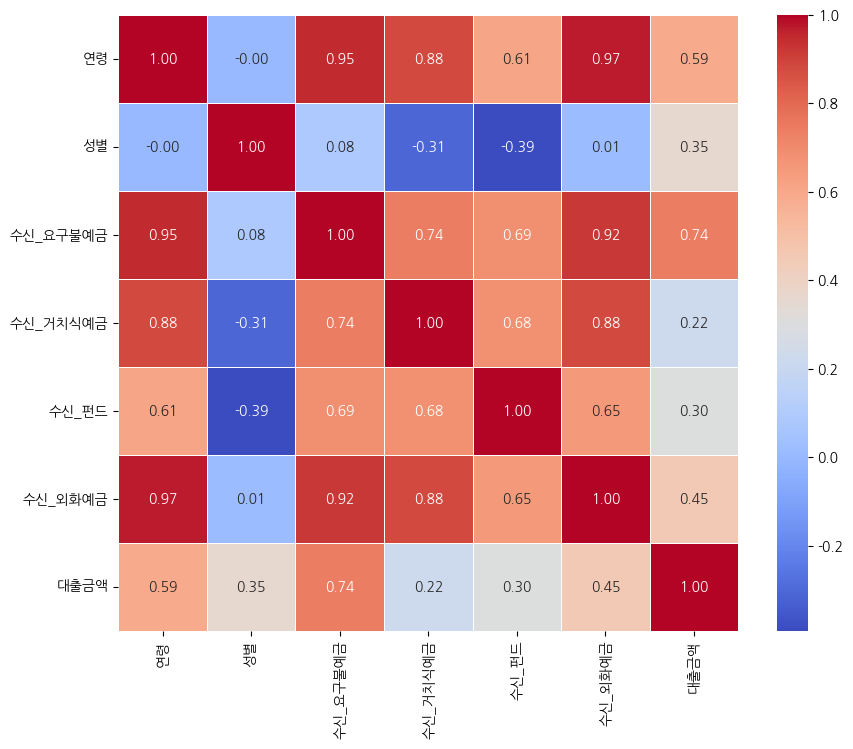

In [14]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlations44, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

성별은 진짜 의미없고\
연령대별 성별은 의미없음

# 주거래 부거래용 요구불 예금 데이터셋

In [6]:
df4['기준년월'] = df4['기준년월'].astype(int)

data444 = df4.loc[df4.groupby('고객ID')['기준년월'].idxmax()]

agg = {
    '수신_요구불예금': 'mean',
    '기준년월': 'first',
    '연령': 'first',
    '성별': 'first'
}

result444 = data444.groupby('고객ID').agg(agg).reset_index()

In [7]:
result444

,고객ID,수신_요구불예금,기준년월,연령,성별
0,2800584251,0.000000e+00,202112,20,남
1,2800585236,0.000000e+00,202112,30,남
2,2800588947,1.000000e+05,202112,30,남
3,2800589092,0.000000e+00,202112,40,여
4,2800597997,0.000000e+00,202112,30,남
...,...,...,...,...,...
1781901,9999988325,1.952174e+06,202110,60,남
1781902,9999989448,4.000000e+05,202110,60,남
1781903,9999991579,0.000000e+00,202110,60,여
1781904,9999997589,0.000000e+00,202110,60,남


In [8]:
result444.to_csv('data_요구불.csv', index=False, encoding='utf-8-sig')